In [27]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_openml
from sklearn.metrics import confusion_matrix

In [3]:
dataset = fetch_openml("mnist_784")

In [28]:
X = np.array(dataset.data, dtype='int64')
y = np.array(dataset.target, dtype='int64')

In [29]:
def predicted(clusters, y):
    p = np.zeros(len(y))
    for i in range(10):
        counts = np.bincount(y[clusters == i])
        if len(counts):
            digit = counts.argmax() # most common
            p[clusters == i] = digit
    return p

In [30]:
Xn = TSNE(n_components=2).fit_transform(X)
clusters = KMeans(n_clusters=10, n_init=10).fit_predict(Xn)
p = predicted(clusters, y)

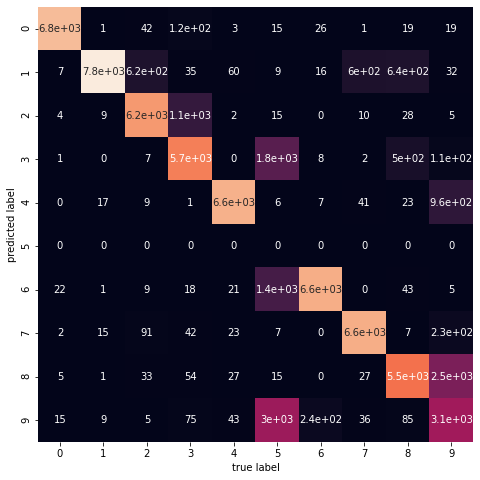

In [31]:
mat = confusion_matrix(y, p)
plt.figure(figsize=(8,8))
sns.heatmap(mat.T, square=True, annot=True, cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');